In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("C:/Users/Administrator/Downloads/archive/Ecommerce Customers.csv")

# Customers Dataset
## Dataset contains data about the time spent by the customer on the app or website before ordering

In [7]:
df.head()  #gives an overview of data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [10]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [11]:
df.describe() # Gives Information about the numerical Variables

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Exploratory Data Analysis 

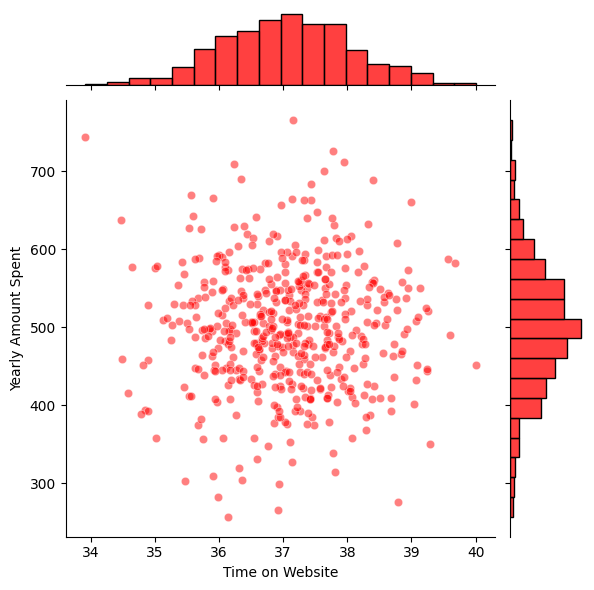

In [12]:
sns.jointplot(x="Time on Website",y="Yearly Amount Spent",data=df,color="red",alpha=0.5)

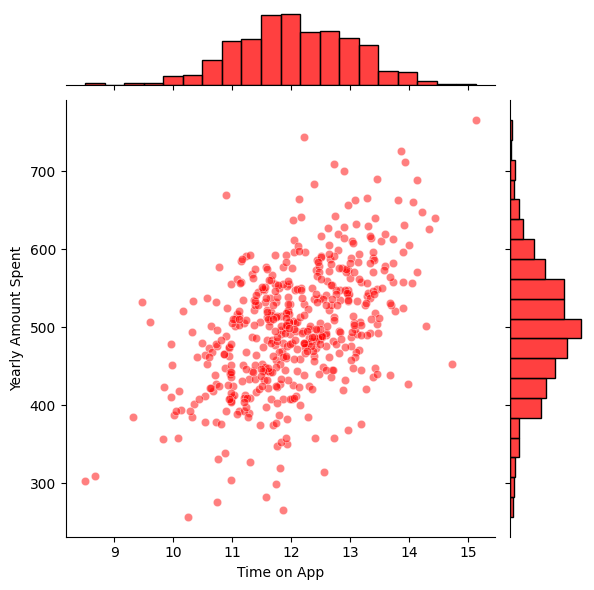

In [13]:
sns.jointplot(x="Time on App",y="Yearly Amount Spent",data=df,color="red",alpha=0.5)

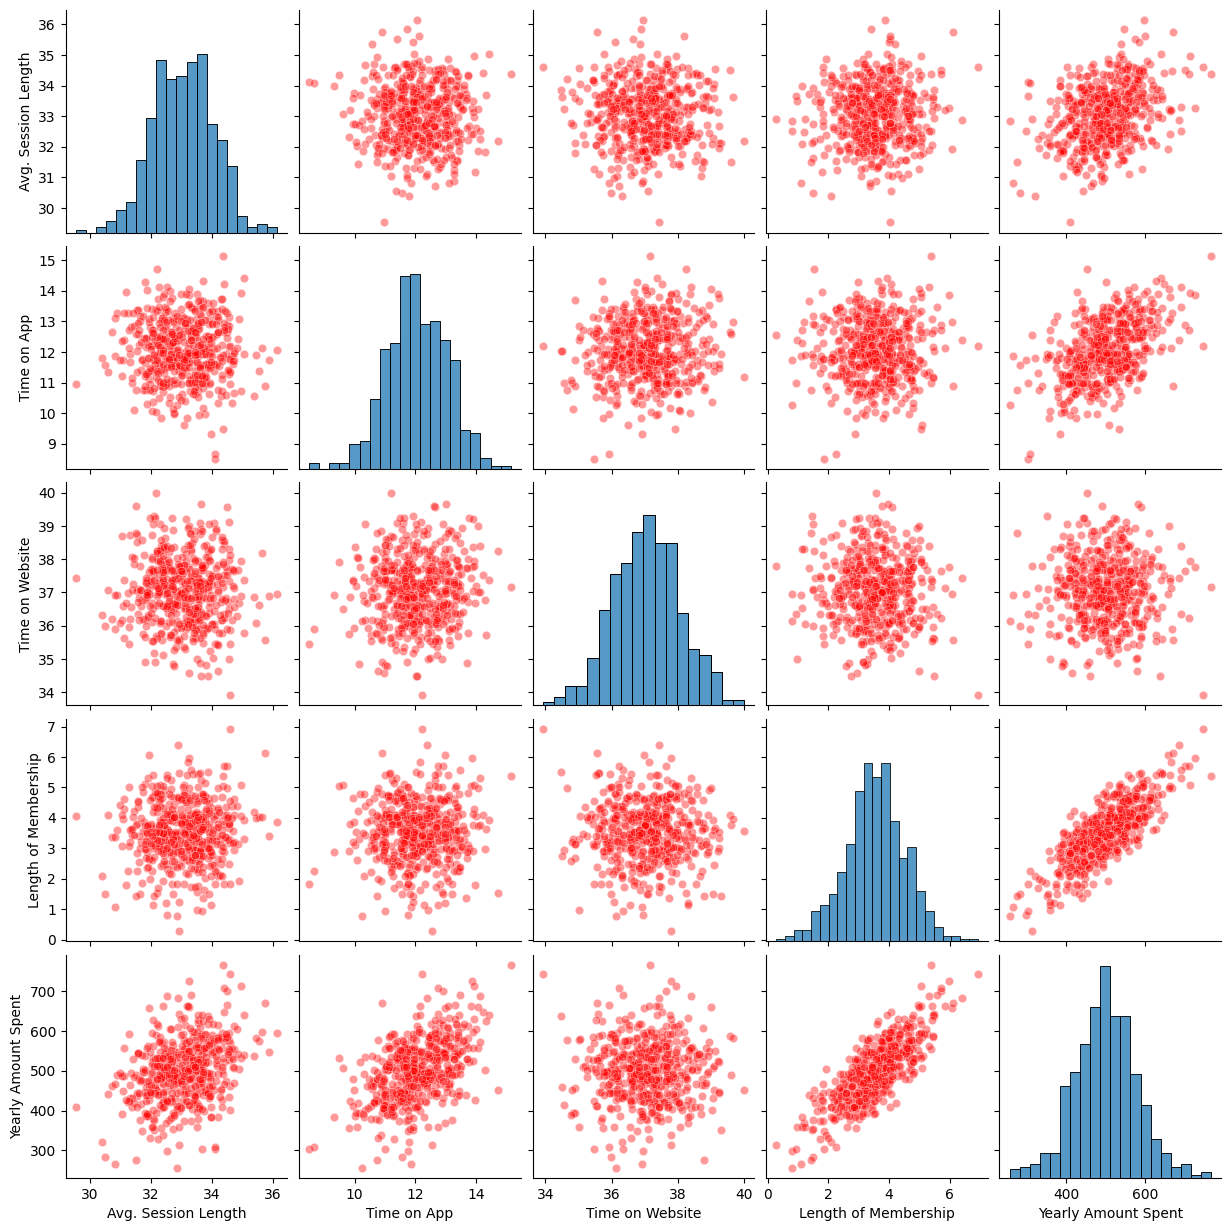

In [15]:
sns.pairplot(df,kind="scatter",plot_kws={'alpha':0.4,'color':'red'})

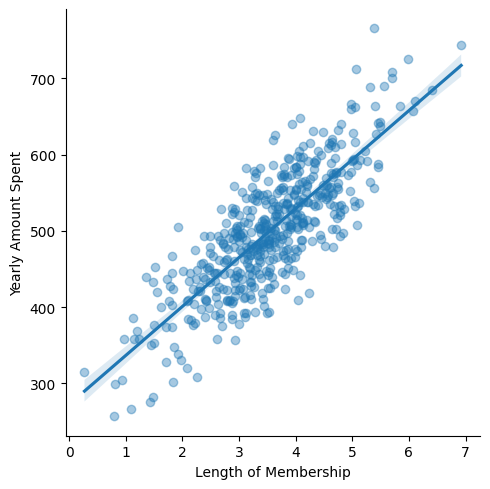

In [16]:
sns.lmplot(x="Length of Membership",y="Yearly Amount Spent",data=df,scatter_kws={'alpha':0.4})

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X= df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y= df['Yearly Amount Spent']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lm = LinearRegression()


In [26]:
lm.fit(X_train,y_train)

LinearRegression()

In [27]:
lm.coef_

array([2.63417867e+01, 3.87915897e+01, 5.86265006e-02, 6.12034173e+01])

In [30]:
coefficients = pd.DataFrame(lm.coef_,X.columns,columns=['Coeffients'])
coefficients 
#The Coefficients Tell The Importance of an independent variable in predicting the target variable

,Coeffients
Avg. Session Length,26.341787
Time on App,38.791590
Time on Website,0.058627
Length of Membership,61.203417


## PREDICTIONS

In [31]:
predictions = lm.predict(X_test)

In [32]:
predictions

array([534.39632392, 372.76721652, 486.99892392, 544.12032375,
       464.08629619, 648.23428889, 478.9963347 , 484.89171959,
       555.59742453, 458.22825161, 417.40149242, 661.44359665,
       559.33999257, 532.86328899, 498.10886882, 505.0108879 ,
       585.3580351 , 470.00973152, 442.31623571, 473.15831585,
       753.63716717, 520.47313497, 502.97979952, 493.60434068,
       542.2398381 , 458.48433337, 573.86906206, 405.42253337,
       494.80942653, 575.42436344, 435.88836775, 508.07164363,
       398.753496  , 512.17243833, 357.8321055 , 543.86657089,
       469.67378103, 279.66646185, 541.44565272, 460.60364752,
       440.39249629, 401.70948634, 456.03155667, 564.45800817,
       652.55206624, 478.94927034, 518.42543058, 412.33258625,
       481.48493218, 461.46040552, 425.37751765, 337.56497516,
       472.59374439, 474.32453018, 488.62577006, 396.57129118,
       456.38063527, 386.50616706, 325.65202428, 528.77445752,
       438.30611345, 460.94173742, 530.94297369, 500.22

Text(0.5, 1.0, 'Evaluation Of LM Model')

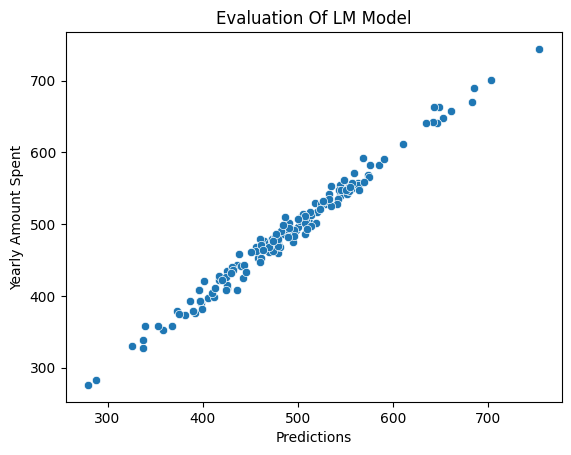

In [35]:
sns.scatterplot(x=predictions ,y= y_test)
plt.xlabel("Predictions")
plt.title("Evaluation Of LM Model")

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [37]:
print("Mean Squared Error:", mean_squared_error(y_test,predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test,predictions))
print("Mean Squared Error:", (mean_squared_error(y_test,predictions))**0.5)

Mean Squared Error: 98.70574113256909
Mean Absolute Error: 8.069181103541975
Mean Squared Error: 9.935076302302317


In [39]:
#Residuals
residuals = y_test-predictions
residuals

130    18.544022
291     5.706350
37      3.739708
239    -5.345390
191    12.680428
         ...    
463    -5.261485
123     4.536243
333    14.168082
273     6.474655
497    -3.047793
Name: Yearly Amount Spent, Length: 150, dtype: float64

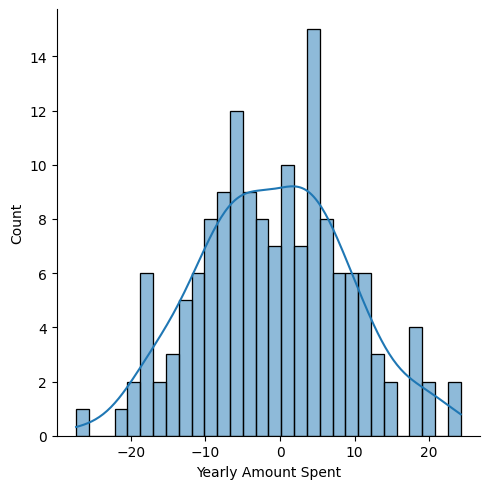

In [41]:
sns.displot(residuals,bins=30,kde=True)